In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [2]:
train = pd.read_csv('datasets/train.csv')
X_train = train.drop(['y'], axis=1)
y_train = train['y']

In [3]:
tmp = X_train.dropna()
tmp.shape

(800, 300)

In [4]:
test = pd.read_csv('datasets/test.csv')
X_test = test.drop(['y'], axis=1)
y_test = test['y']

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [121]:
# parameters = {
#     "model__penalty":['l2','l1'],
#     "model__C":[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# my_pipeline = Pipeline(steps=[('model', LinearSVC(random_state=42,
                                                           
#                                                           dual=False))])

In [122]:
# grid_logreg = GridSearchCV(my_pipeline, parameters, n_jobs=-1,scoring='accuracy')
# grid_logreg.fit(X_train, y_train)
# grid_logreg.best_estimator_

Pipeline(steps=[('model', LinearSVC(C=0.1, dual=False, random_state=42))])

In [123]:
linear_model = LinearSVC(random_state=42,dual=False,penalty='l2')
linear_model.fit(X_train, y_train)

LinearSVC(dual=False, random_state=42)

In [124]:
# linear model accuracy
print(f'Model test accuracy: {linear_model.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 83.500%


In [130]:
from sklearn.metrics import classification_report, confusion_matrix
def confusion_plot(predictions_def):
    
    cf_matrix = confusion_matrix(y_test, predictions_def)
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    categories=['Bad review', 'Good review']

    fig, ax1 = plt.subplots(1, 1,figsize=(10,6))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=categories,
                yticklabels=categories,ax=ax1)

    
    plt.suptitle("CONFUSION MATRIX")

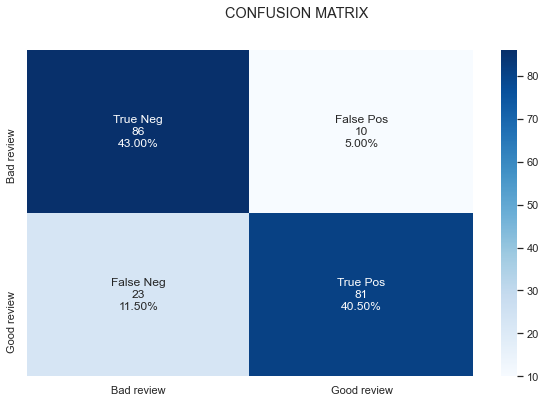

In [131]:
# confusion matrix for linear svm
predictions = linear_model.predict(X_test)
confusion_plot(predictions)

In [134]:
# save LINEAR model

import pickle 
filename = 'models/linear_model.sav'
pickle.dump(linear_model, open(filename, 'wb'))

In [133]:
#XGBCLASSIFIER

In [6]:
from xgboost import XGBClassifier

In [137]:
# finding best parameters
parameters_XG = {
    "model__n_estimators":[100,200,400,500,700,1000],
    "model__learning_rate":[0.01,0.02,0.05,0.07,0.1]}

my_pipeline_XG = Pipeline(steps=[('model', XGBClassifier(random_state=42))])

In [138]:
xgb = GridSearchCV(my_pipeline_XG, parameters_XG, n_jobs=-1)
xgb.fit(X_train, y_train)
xgb.best_params_

C:\Users\Bonnana\Anaconda3\envs\thesis\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'model__learning_rate': 0.05, 'model__n_estimators': 1000}

In [7]:
# fit model with best parameters
xgb_model = XGBClassifier(random_state=42,learning_rate=0.02, n_estimators=1000)
xgb_model.fit(X_train, y_train)

C:\Users\Bonnana\Anaconda3\envs\thesis\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
# model acccuracy
print(f'Model test accuracy: {xgb_model.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 82.500%


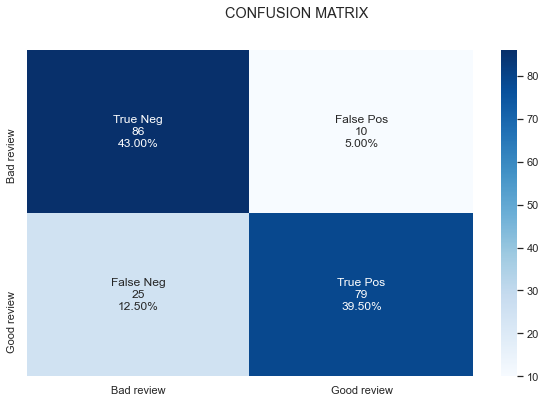

In [144]:
# confusion matrix
predictions_xgb = xgb_model.predict(X_test)
confusion_plot(predictions_xgb)

In [11]:
# save XGBClassifier model
filename = 'models/xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))
# xgb_model.save_model('models/xgb_model.model')